In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [26]:
data = pd.read_csv("Data-Prepped-ELO-2-Groups.csv",index_col=0)
data = data.astype(np.float32)
data.head()

Low_ELO  High_ELO  GroupedLeagueIndex  LeagueIndex   Age  HoursPerWeek  \
0      0.0       1.0                 1.0          5.0  27.0          10.0   
1      0.0       1.0                 1.0          5.0  23.0          10.0   
2      0.0       0.0                 0.0          4.0  30.0          10.0   
3      1.0       0.0                 0.0          3.0  19.0          20.0   
4      1.0       0.0                 0.0          3.0  32.0          10.0   

   TotalHours         APM  SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  \
0      3000.0  143.718002         0.003515         0.000220            7.0   
1      5000.0  129.232193         0.003304         0.000259            4.0   
2       200.0   69.961197         0.001101         0.000336            4.0   
3       400.0  107.601601         0.001034         0.000213            1.0   
4       500.0  122.890800         0.001136         0.000327            2.0   

   MinimapAttacks  MinimapRightClicks  NumberOfPACs  GapBetweenPACs  \
0        0.000110            0.000392      0.004849       32.667702   
1        0.000294            0.000432      0.004307       32.919399   
2        0.000294            0.000461      0.002926       44.647499   
3        0.000053            0.000543      0.003783       29.220301   
4        0.000000            0.001329      0.002368       22.688499   

   ActionLatency  ActionsInPAC  TotalMapExplored  WorkersMade  \
0      40.867298        4.7508              28.0     0.001397   
1      42.345402        4.8434              22.0     0.001194   
2      75.354797        4.0430              22.0     0.000745   
3      53.735199        4.9155              19.0     0.000426   
4      62.081299        9.3740              15.0     0.001174   

   UniqueUnitsMade  ComplexUnitsMade  ComplexAbilitiesUsed  
0              6.0               0.0              0.000000  
1              5.0               0.0              0.000208  
2              6.0               0.0              0.000189  
3              7.0               0.0              0.000384  
4              4.0               0.0              0.000019

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3337
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Low_ELO               3338 non-null   float32
 1   High_ELO              3338 non-null   float32
 2   GroupedLeagueIndex    3338 non-null   float32
 3   LeagueIndex           3338 non-null   float32
 4   Age                   3338 non-null   float32
 5   HoursPerWeek          3338 non-null   float32
 6   TotalHours            3338 non-null   float32
 7   APM                   3338 non-null   float32
 8   SelectByHotkeys       3338 non-null   float32
 9   AssignToHotkeys       3338 non-null   float32
 10  UniqueHotkeys         3338 non-null   float32
 11  MinimapAttacks        3338 non-null   float32
 12  MinimapRightClicks    3338 non-null   float32
 13  NumberOfPACs          3338 non-null   float32
 14  GapBetweenPACs        3338 non-null   float32
 15  ActionLatency        

In [28]:
inddatatxt = open("Data Explanation -- StarCraft II Ranked Players.txt")
print(inddatatxt.read())
var = []
for i in data:
    var.append(i)

Data project data categories

Data pulled from https://www.kaggle.com/danofer/skillcraft which pulled the data from the University of California Irvine's machine learning repository located at http://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset 

This data is taken from replays of 1v1 ranked games of StarCraft II, a real time strategy game in which two or more players compete by accruing resources, building an army and wiping out the enemy. 
A player loses when all of their buildings are destroyed or when they surrender.
Players each start with one base hub and a number of workers located symmetrically on a map. The map is littered with locations containing clusters of minerals and usually gas geysers. 
These are the resources which the players will use to build buildings, construct new technologies and produce armies. 



00 GameID				#
01 LeagueIndex			# Numerical list (1-8) based on categorical rank. Can be considered both categorical and numerical
02 Age				# Ag

In [29]:
data.describe()

Low_ELO     High_ELO  GroupedLeagueIndex  LeagueIndex          Age  \
count  3338.000000  3338.000000         3338.000000  3338.000000  3338.000000   
mean      0.319652     0.437388            0.437388     4.120731    21.650389   
std       0.466412     0.496139            0.496139     1.448170     4.206357   
min       0.000000     0.000000            0.000000     1.000000    16.000000   
25%       0.000000     0.000000            0.000000     3.000000    19.000000   
50%       0.000000     0.000000            0.000000     4.000000    21.000000   
75%       1.000000     1.000000            1.000000     5.000000    24.000000   
max       1.000000     1.000000            1.000000     7.000000    44.000000   

       HoursPerWeek      TotalHours          APM  SelectByHotkeys  \
count   3338.000000     3338.000000  3338.000000      3338.000000   
mean      15.909527      960.421814   114.575768         0.004023   
std       11.964495    17318.134766    48.111912         0.004726   
min        0.000000        3.000000    22.059601         0.000000   
25%        8.000000      300.000000    79.231501         0.001245   
50%       12.000000      500.000000   107.070297         0.002445   
75%       20.000000      800.000000   140.156094         0.004945   
max      168.000000  1000000.000000   389.831390         0.043088   

       AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
count      3338.000000    3338.000000     3338.000000         3338.000000   
mean          0.000364       4.316357        0.000094            0.000380   
std           0.000210       2.333322        0.000159            0.000359   
min           0.000000       0.000000        0.000000            0.000000   
25%           0.000202       3.000000        0.000000            0.000139   
50%           0.000349       4.000000        0.000039            0.000278   
75%           0.000493       6.000000        0.000113            0.000508   
max           0.001648      10.000000        0.003019            0.003688   

       NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
count   3338.000000     3338.000000    3338.000000   3338.000000   
mean       0.003433       40.713818      64.209587      5.266955   
std        0.000966       17.057190      19.037394      1.500605   
min        0.000679        6.666700      24.632601      2.038900   
25%        0.002743       29.326599      50.886426      4.261525   
50%        0.003376       37.058901      61.296099      5.087050   
75%        0.004003       48.510426      74.032524      6.027350   
max        0.007971      237.142899     176.372101     18.558100   

       TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
count       3338.000000  3338.000000      3338.000000       3338.000000   
mean          22.116837     0.001031         6.541042          0.000060   
std            7.440876     0.000520         1.859048          0.000112   
min            5.000000     0.000077         2.000000          0.000000   
25%           17.000000     0.000682         5.000000          0.000000   
50%           22.000000     0.000904         6.000000          0.000000   
75%           27.000000     0.001258         8.000000          0.000087   
max           58.000000     0.005149        13.000000          0.000902   

       ComplexAbilitiesUsed  
count           3338.000000  
mean               0.000142  
std                0.000266  
min                0.000000  
25%                0.000000  
50%                0.000020  
75%                0.000182  
max                0.003084

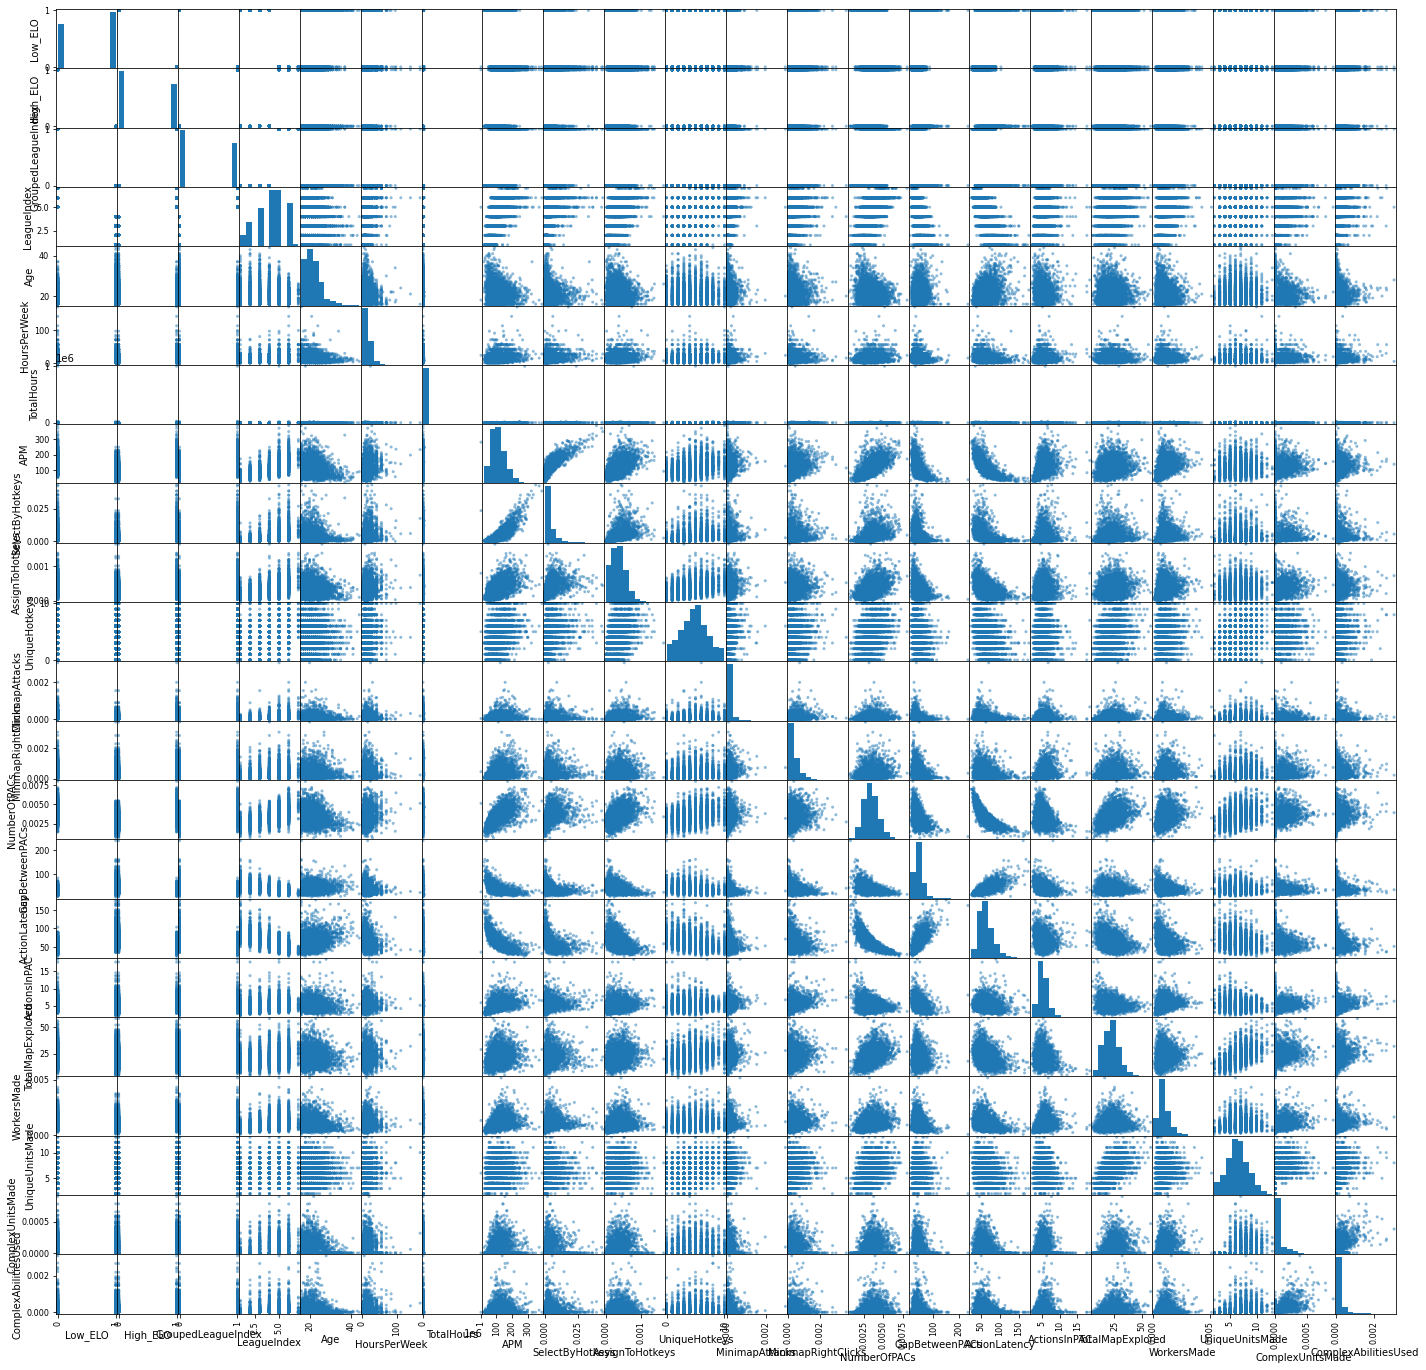

In [6]:
pd.plotting.scatter_matrix(data,figsize=(24,24))
plt.show()

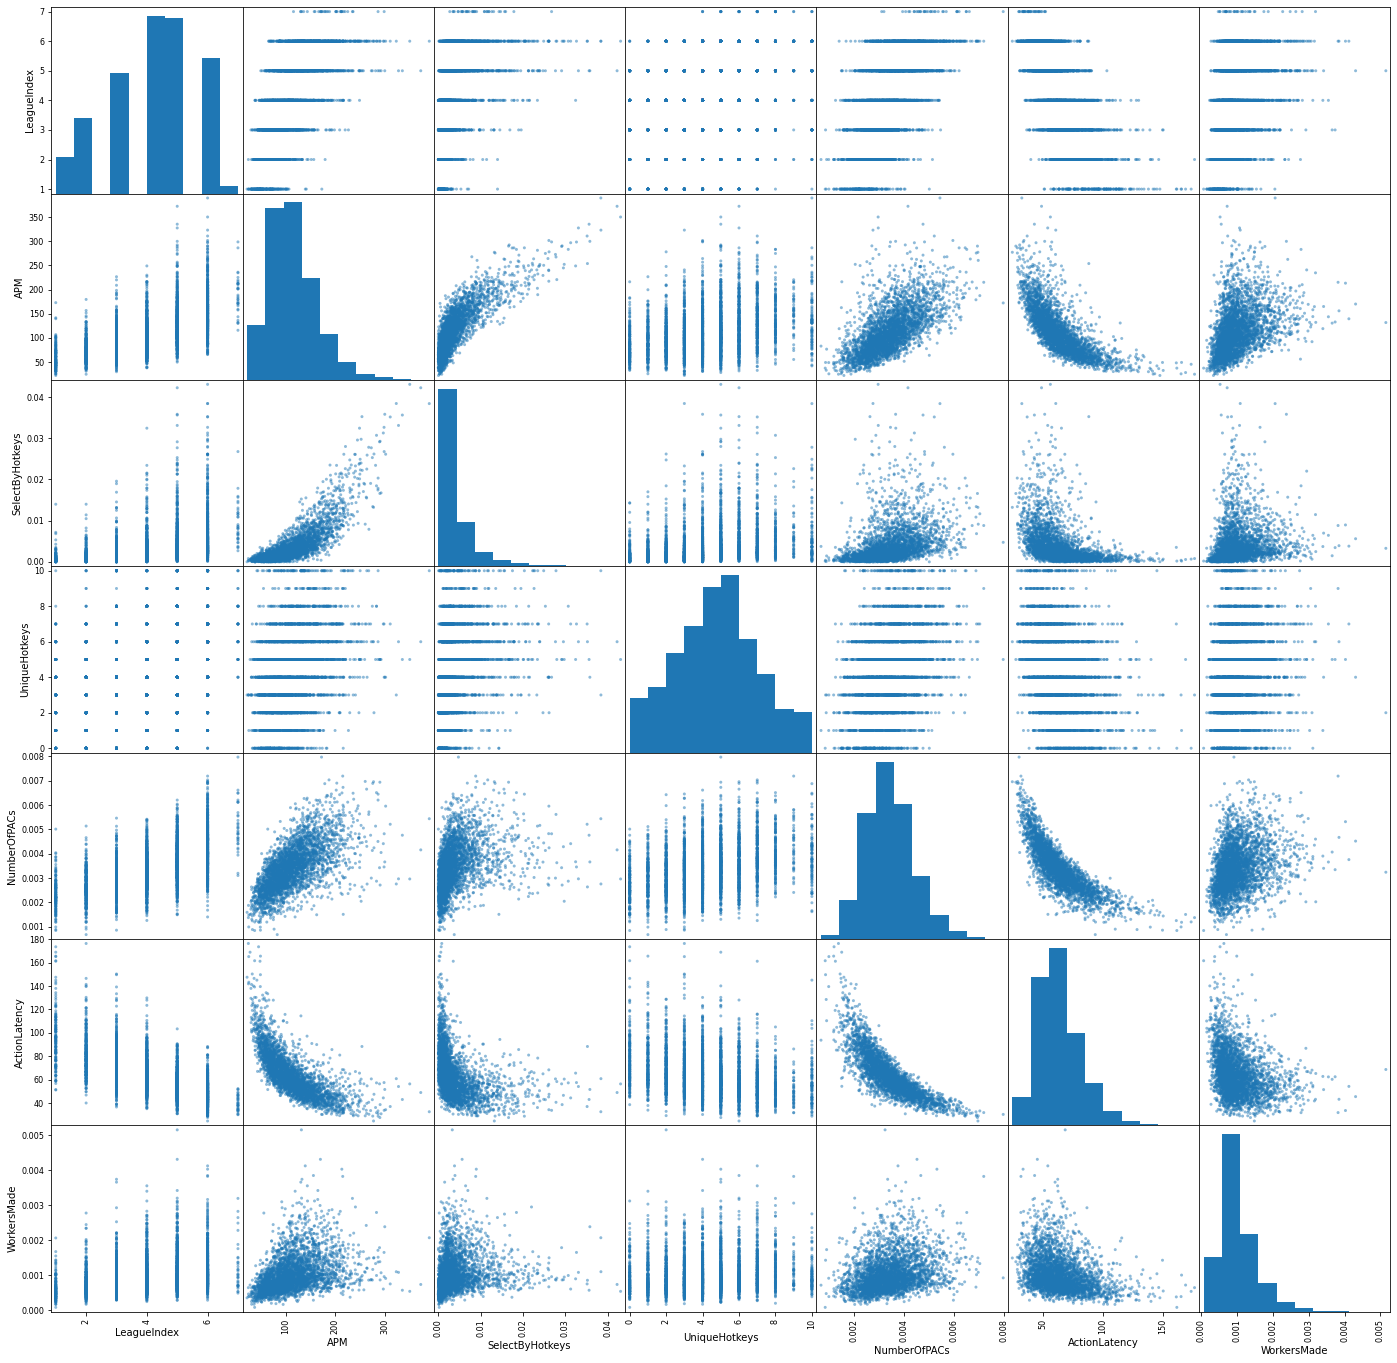

In [7]:
IDs = ['LeagueIndex','APM','SelectByHotkeys','UniqueHotkeys','NumberOfPACs','ActionLatency','WorkersMade']
pd.plotting.scatter_matrix(data[IDs],figsize=(24,24))
plt.show()

### Examine variables from sklearn.decomposition.PCA

In [8]:
pca = PCA()
pca.fit(data[IDs])
data_transformed = pd.DataFrame(pca.transform(data[IDs]))
data_transformed.shape

(3338, 7)

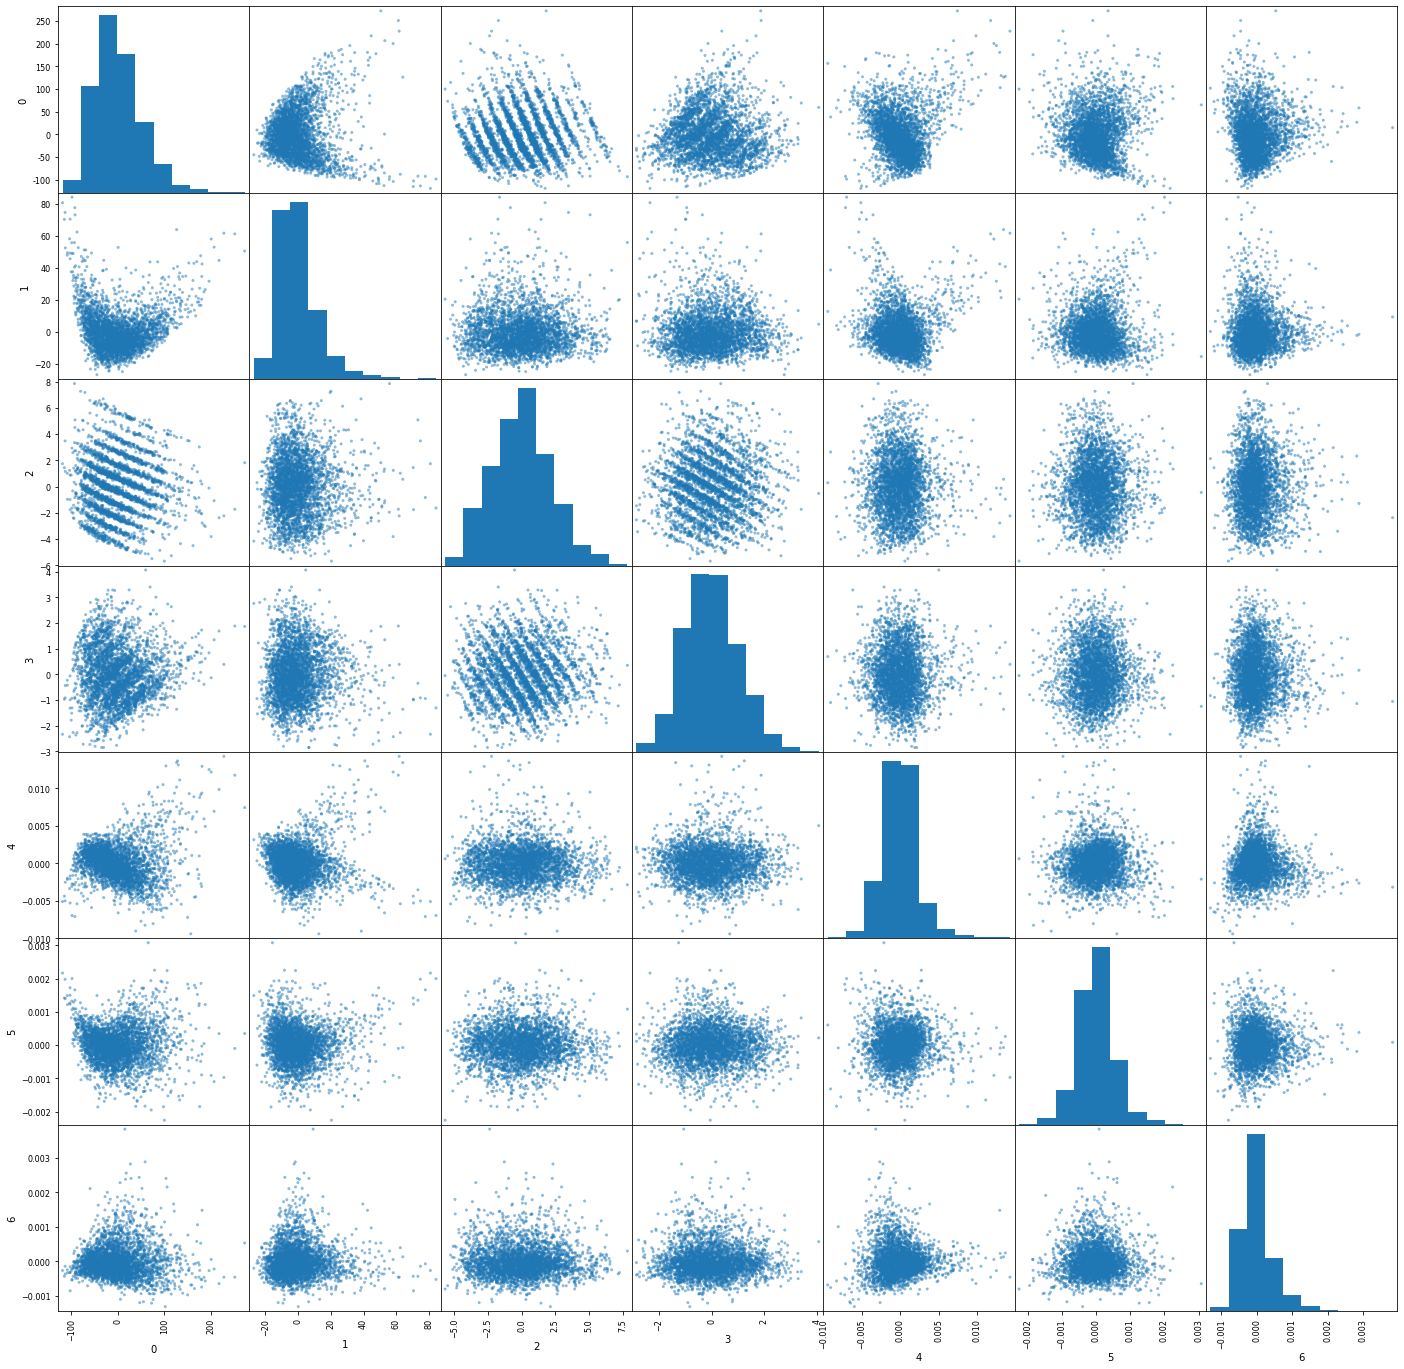

In [9]:
pd.plotting.scatter_matrix(data_transformed,figsize=(24,24))
plt.show()

In [30]:
# Code for the following graphs based on https://www.kaggle.com/immodal/predicting-player-placement
leagueTitles = ["Low ELO","High ELO"]
leagueIndexs = [      0.0,       1.0]
colors       = ['darkgoldenrod','gold']
leagueDict   = dict()
for i, ind in enumerate(leagueIndexs):
    leagueDict[ind] = leagueTitles[i]
leagueLabeled = data["GroupedLeagueIndex"].replace(leagueDict)

def violin_plot(y, title, w, h):
    plt.figure(figsize=(w,h))
    ax = sns.violinplot(x=leagueLabeled,y=y,palette=colors,order=leagueTitles)
    ax.set(xlabel='ELO Group')
    ax.set_ylim(0,)
    plt.title(title)
    plt.show()
    
def density_plot(x, title, w, h):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,.85)})
    fig.set_size_inches(w,h)
    ax_box.set_xlim(0,x.max())
    ax_hist.set_xlim(0,x.max())
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box,left=True)
    ax_box.set_title(title)
    plt.show()
    
def plot(feature, fig_num):
    density_plot(data[feature],f"Figure {fig_num}: {feature} Distribution", 11,8)
    violin_plot(data[feature],f"Figure {fig_num}: {feature} by League", 11,8)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


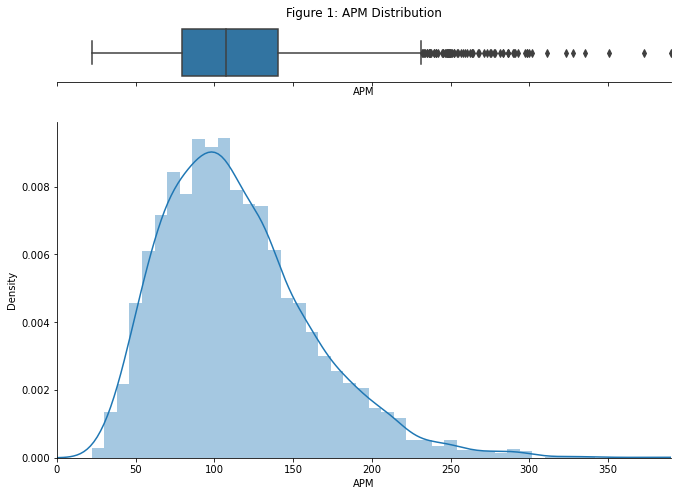

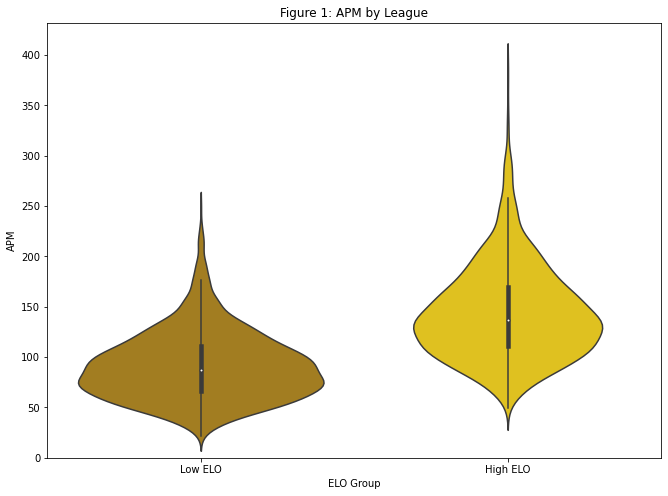

In [31]:
plot("APM",1)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


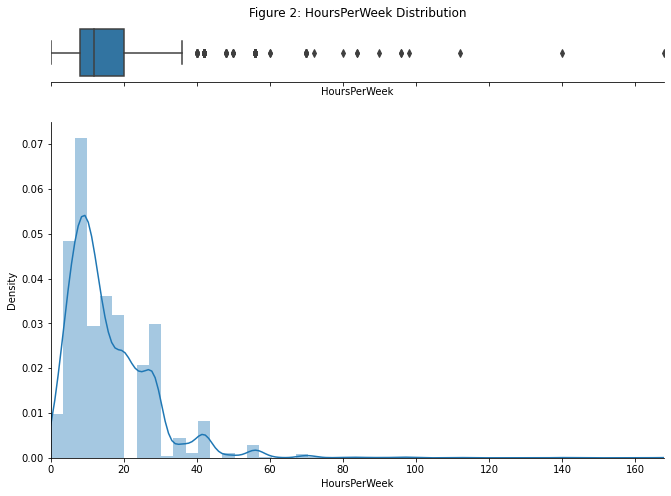

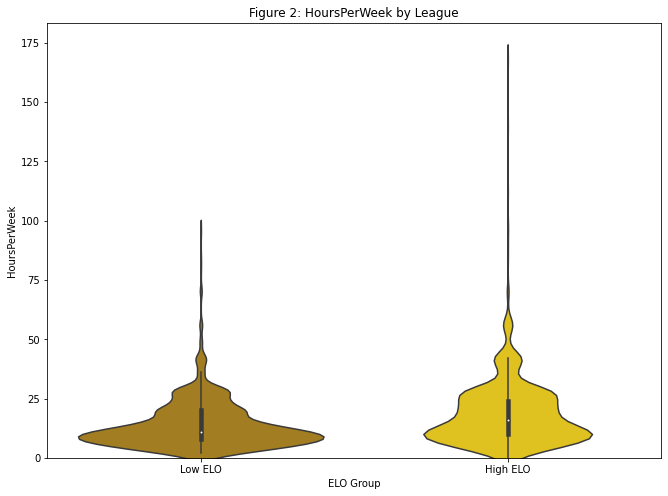

In [32]:
plot("HoursPerWeek",2)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


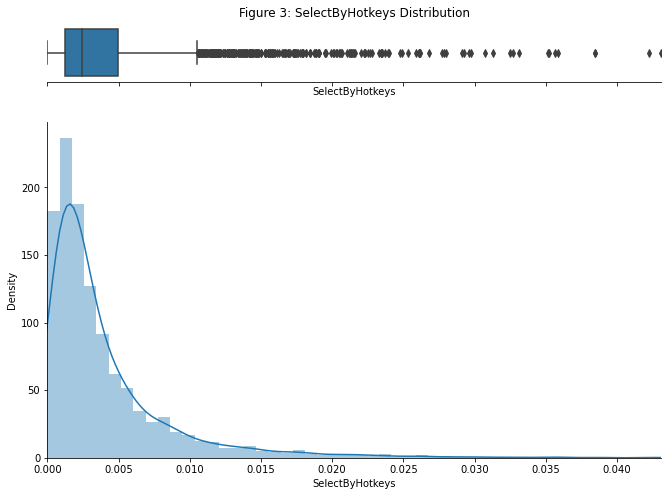

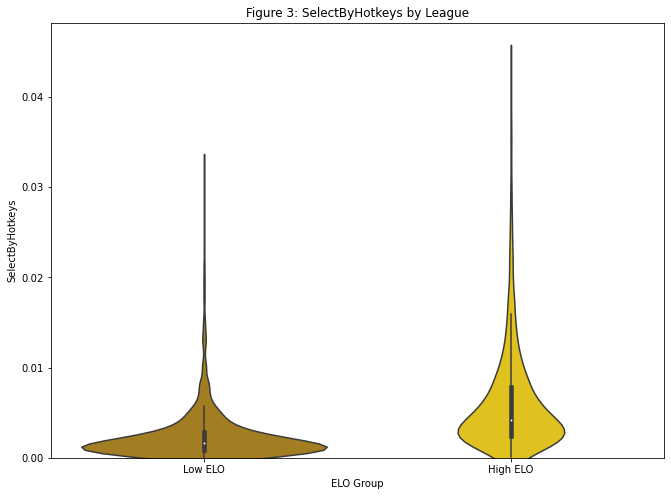

In [33]:
plot("SelectByHotkeys",3)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


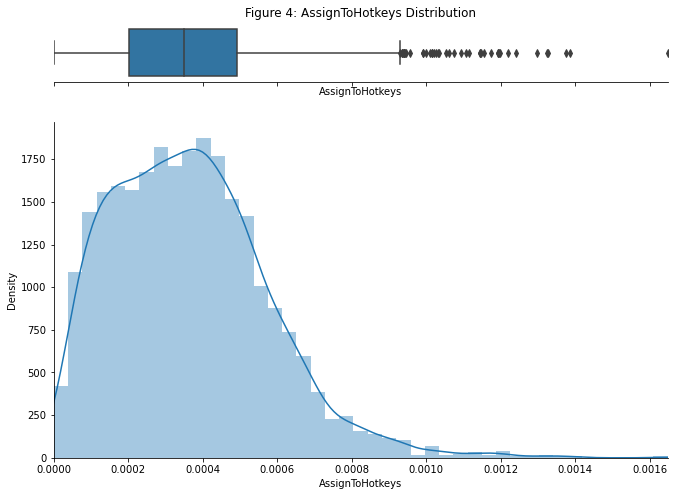

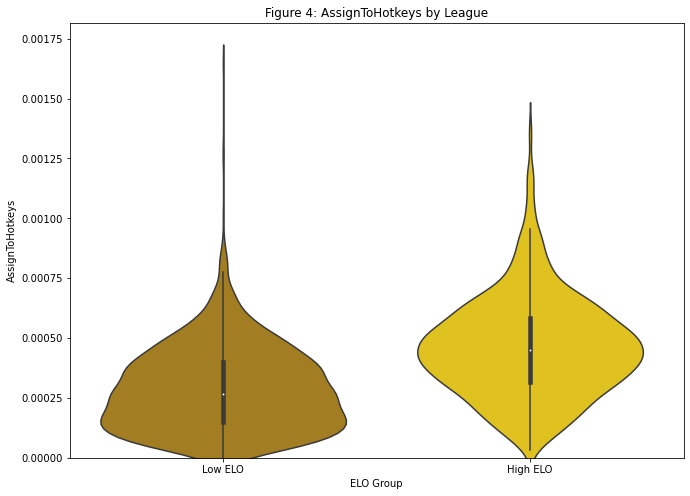

In [34]:
plot("AssignToHotkeys",4)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


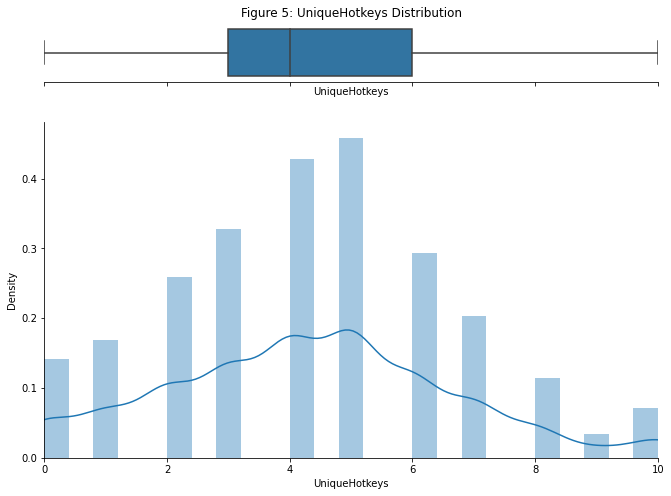

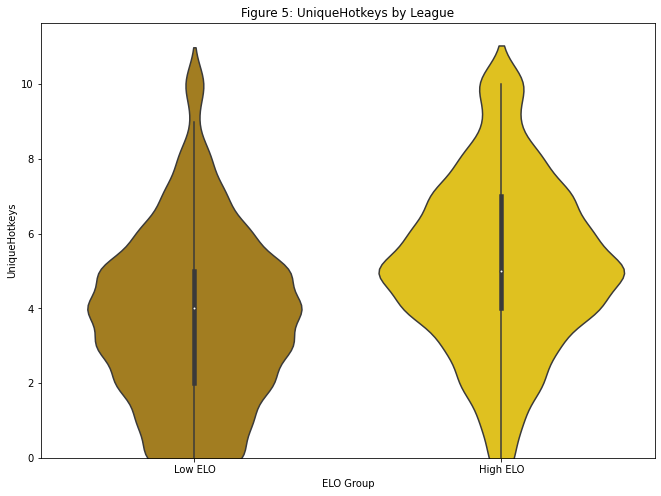

In [35]:
plot("UniqueHotkeys",5)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


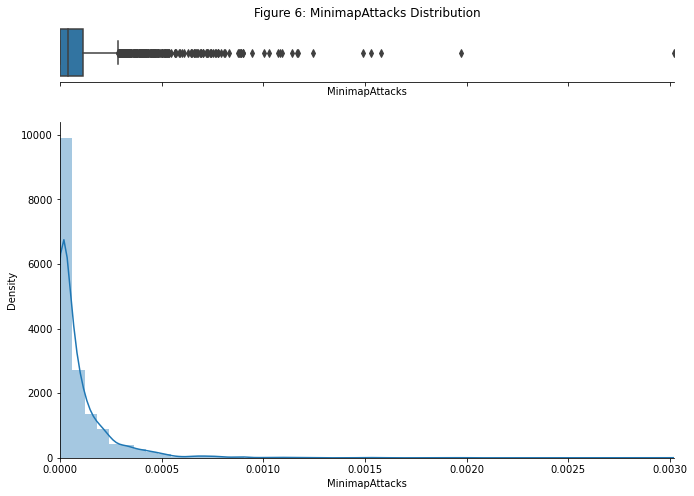

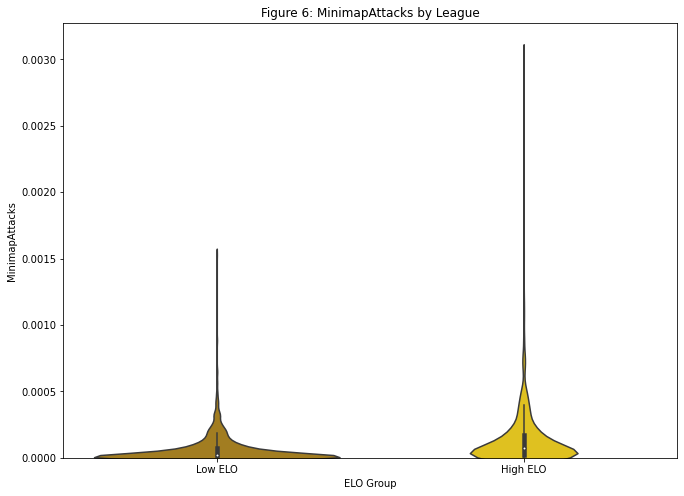

In [36]:
plot("MinimapAttacks",6)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


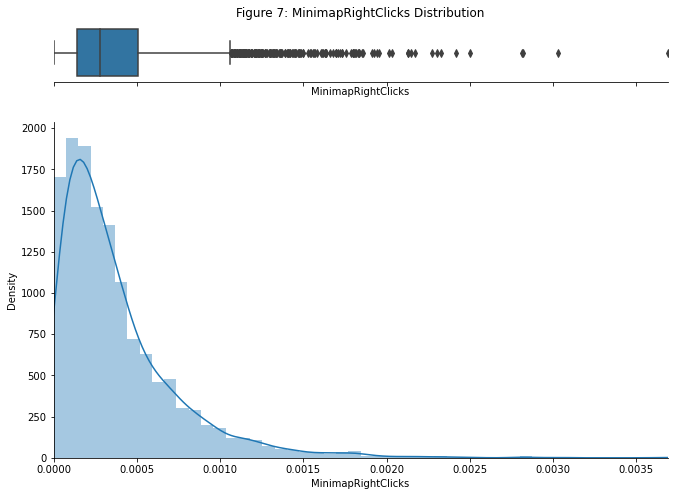

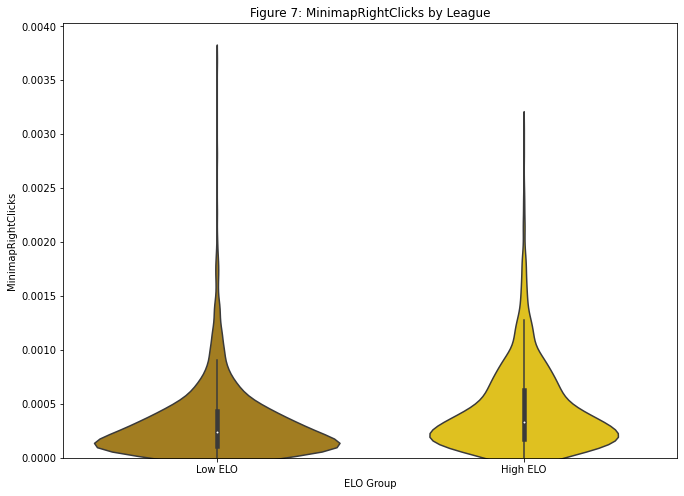

In [37]:
plot("MinimapRightClicks",7)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


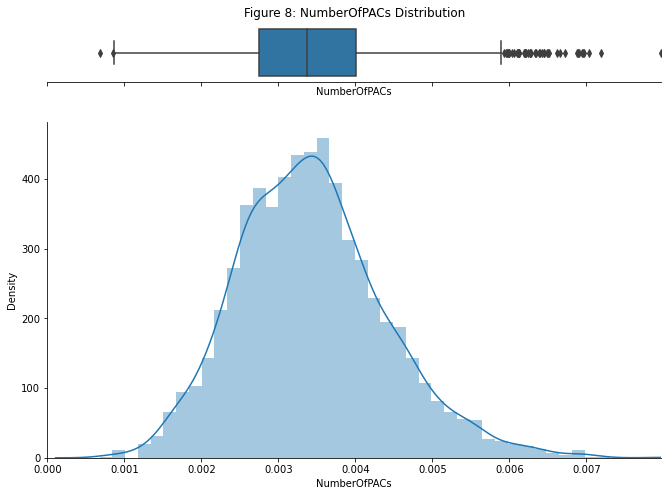

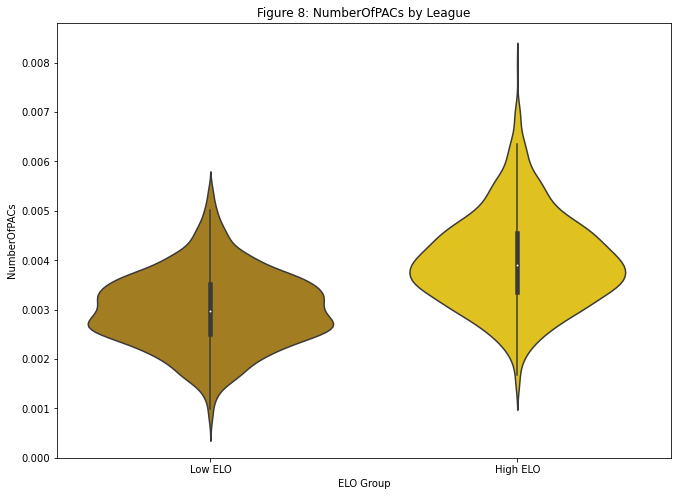

In [38]:
plot("NumberOfPACs",8)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


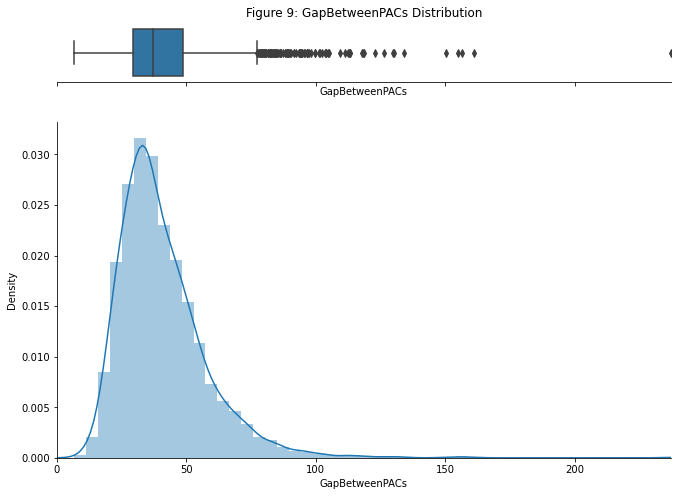

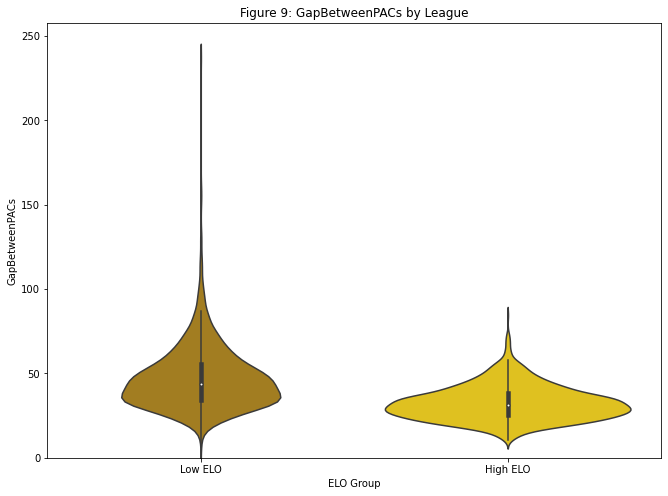

In [39]:
plot("GapBetweenPACs",9)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


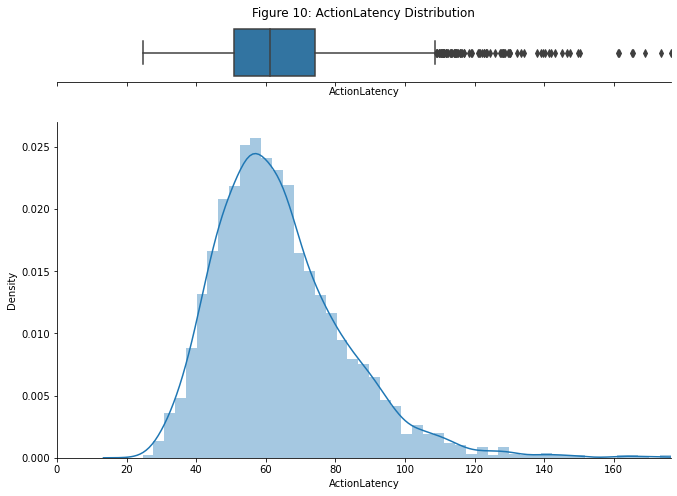

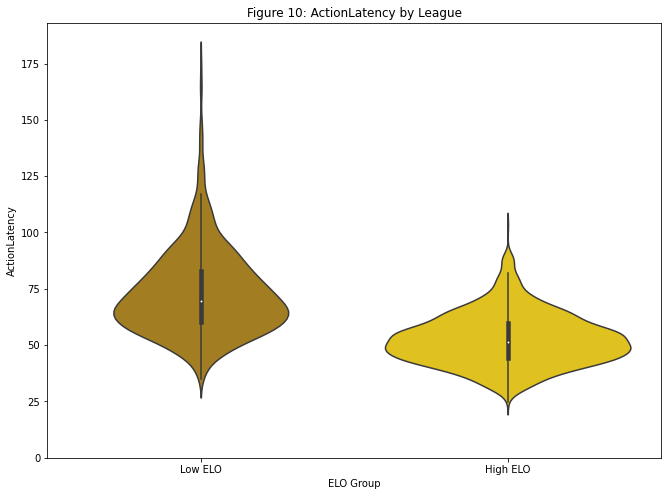

In [40]:
plot("ActionLatency",10)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


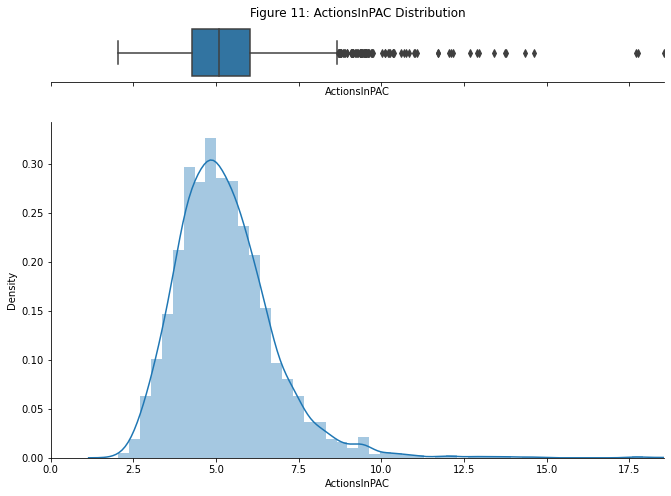

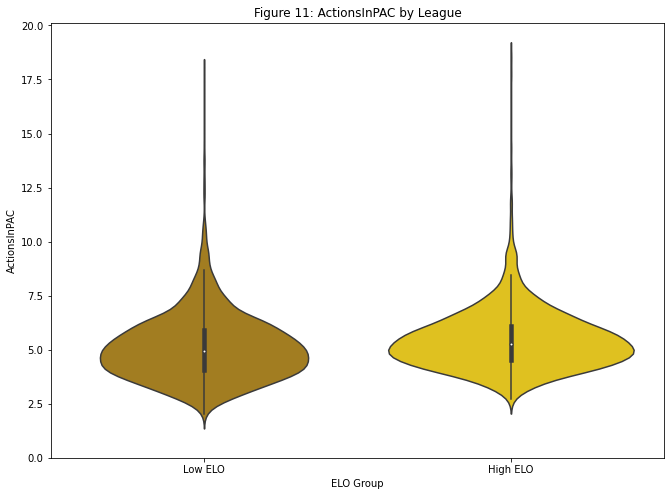

In [41]:
plot("ActionsInPAC",11)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


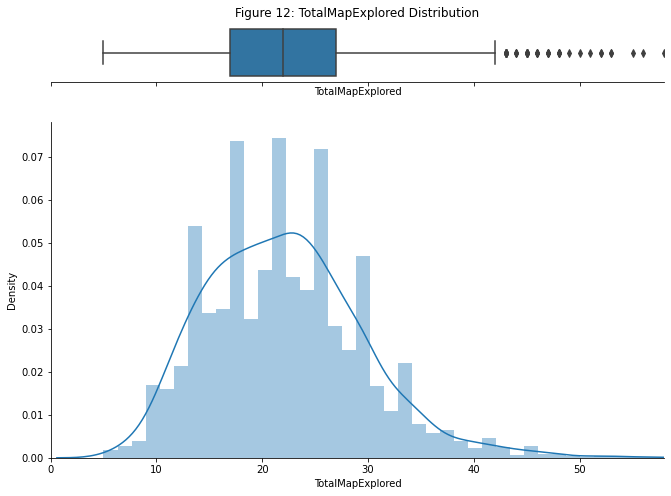

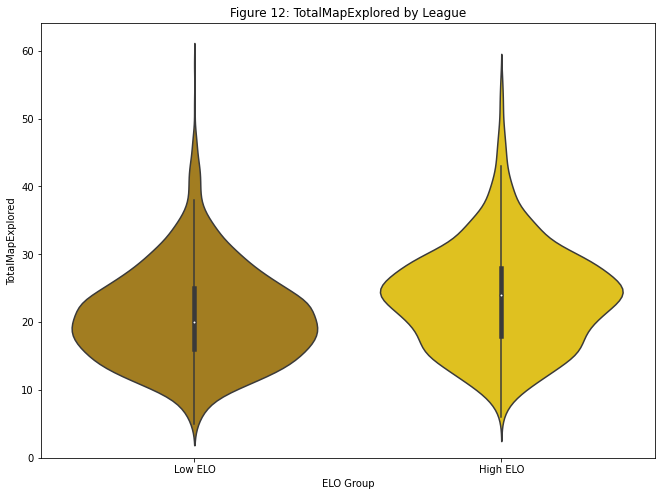

In [42]:
plot("TotalMapExplored",12)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


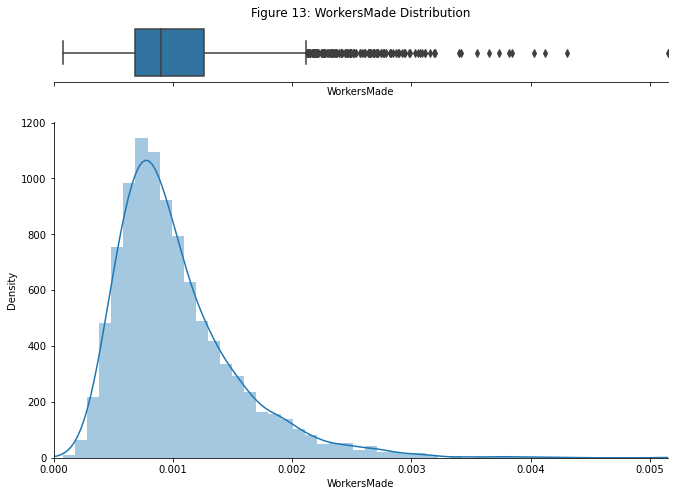

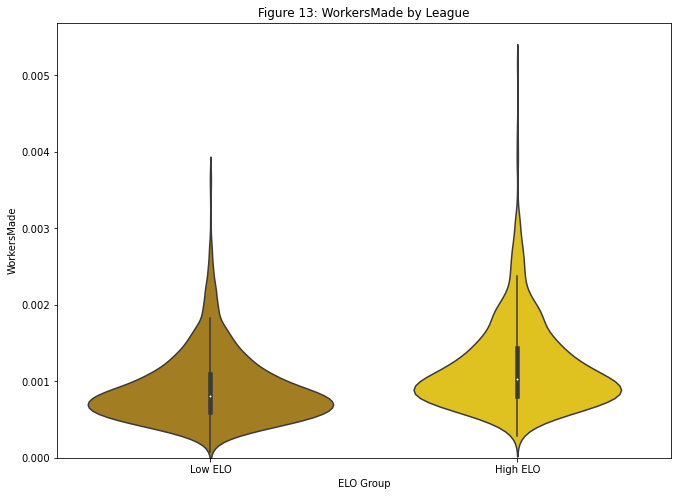

In [43]:
plot("WorkersMade",13)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


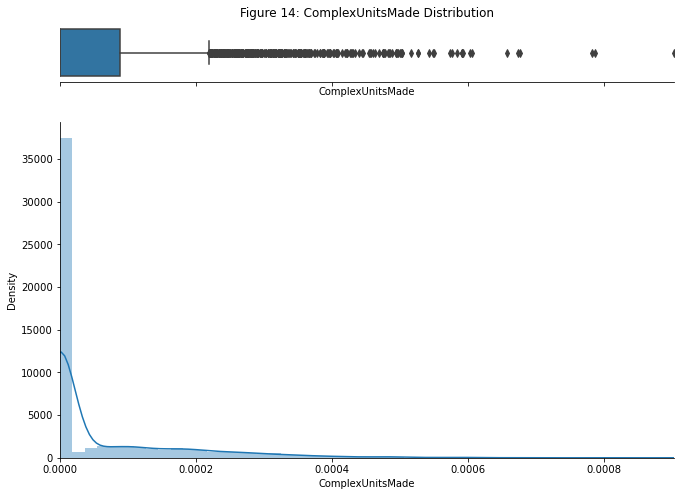

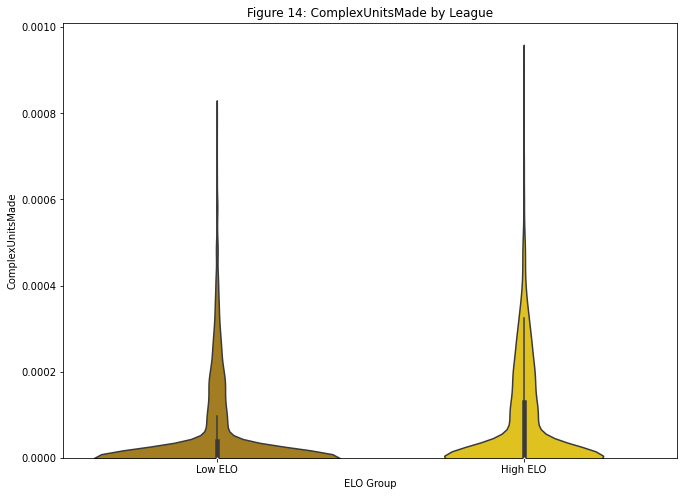

In [44]:
plot("ComplexUnitsMade",14)

C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Triplea657\anaconda3\envs\MSCS335\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


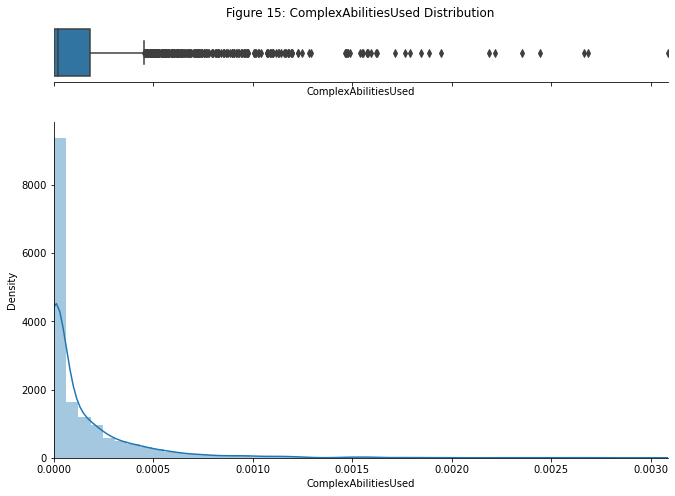

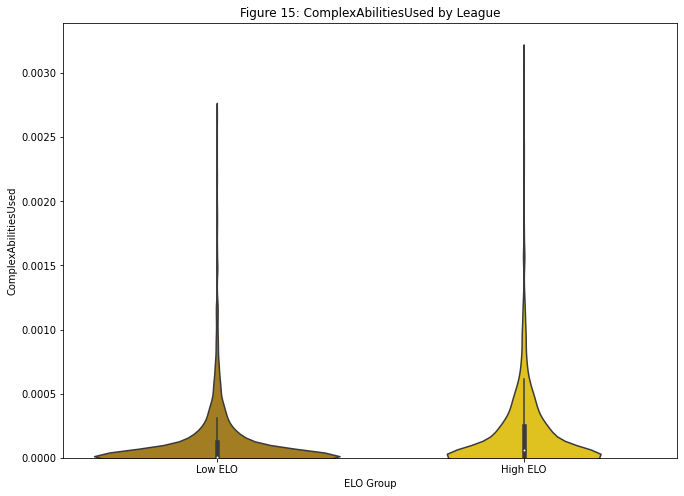

In [45]:
plot("ComplexAbilitiesUsed",15)